In [7]:
library("survival")
library("survminer")
library("ranger")
library("ggplot2")
library("dplyr")
library("ggfortify")

In [8]:
df <- read.csv("Final_NHANES.csv")

In [9]:
for (i in 1:nrow(df)){
    df$SEQN[i] = i
}

In [10]:
levels(df$mortstat) <- c(0,1)

In [11]:
head(df)

SEQN,Gender,Age,Race1,Education,MaritalStatus,HHIncomeMid,Poverty,HomeRooms,HomeOwn,...,UrineFlow1,Diabetes,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,SleepHrsNight,SleepTrouble,PhysActive,Smoke100,mortstat
1,male,34.00000,Race1_White,High School,Married,30000.00,1.360000,6.000000,HomeOwn_Own,...,1.7017764,Diabetes_No,Good,0.000000,15.0000000,4.000000,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes,0
2,male,34.00000,Race1_White,High School,Married,30000.00,1.360000,6.000000,HomeOwn_Own,...,1.7017764,Diabetes_No,Good,0.000000,15.0000000,4.000000,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes,0
3,male,34.00000,Race1_White,High School,Married,30000.00,1.360000,6.000000,HomeOwn_Own,...,1.7017764,Diabetes_No,Good,0.000000,15.0000000,4.000000,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes,0
4,male,4.00000,Race1_Other,College Grad,NeverMarried,22500.00,1.070000,9.000000,HomeOwn_Own,...,0.3680715,Diabetes_No,Vgood,-4.463701,0.2140656,7.926828,SleepTrouble_No,PhysActive_Yes,Smoke100_No,0
5,female,38.82787,Race1_White,Some College,Married,55898.88,2.769805,6.220442,HomeOwn_Own,...,0.9426834,Diabetes_No,Good,2.817233,4.0134528,7.003282,SleepTrouble_No,PhysActive_Yes,Smoke100_No,0
6,female,38.82787,Race1_White,Some College,Married,55898.88,2.769805,6.220442,HomeOwn_Own,...,0.9426834,Diabetes_No,Good,2.817233,4.0134528,7.003282,SleepTrouble_No,PhysActive_Yes,Smoke100_No,0


In [15]:
dim(df)

[1] 23514    30

In [6]:
r_fit <- ranger(Surv(Age, mortstat) ~ BPSysAve + DirectChol + BPDiaAve + Weight + PhysActive + Poverty + TotChol + UrineFlow1 + DaysMentHlthBad + UrineVol1 + DaysPhysHlthBad + BMI + HHIncomeMid + SleepHrsNight + Pulse + Gender + Diabetes + Smoke100 + SleepTrouble, data =  df, mtry = 4, importance = "permutation", splitrule = "extratrees", verbose = TRUE)

In [7]:
death_times <- r_fit$unique.death.times

In [8]:
surv_prob <- data.frame(r_fit$survival)

In [9]:
avg_prob <- sapply(surv_prob,mean)

In [10]:
head(surv_prob)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105
1,1,1,1,1,1,1,1,1,1,...,0.7973424,0.7930208,0.7823189,0.7749137,0.7623817,0.7582495,0.7582495,0.6830944,0.6540833,0.6330985
1,1,1,1,1,1,1,1,1,1,...,0.8225447,0.8205480,0.8128434,0.8038480,0.7885285,0.7847721,0.7847721,0.7040779,0.6591656,0.6317678
1,1,1,1,1,1,1,1,1,1,...,0.8001133,0.7943057,0.7848159,0.7741015,0.7590681,0.7481541,0.7481541,0.6686210,0.6372815,0.6191610
1,1,1,1,1,1,1,1,1,1,...,0.9000060,0.8901797,0.8759033,0.8759033,0.8654760,0.8620279,0.8620279,0.7183612,0.7183612,0.7183612
1,1,1,1,1,1,1,1,1,1,...,0.9811514,0.9811514,0.9796034,0.9744611,0.9637884,0.9637884,0.9637884,0.8469023,0.8469023,0.8469023
1,1,1,1,1,1,1,1,1,1,...,0.9701099,0.9701099,0.9670329,0.9617049,0.9526394,0.9526394,0.9526394,0.8615238,0.8615238,0.8615238


In [11]:
death_times

[1]  0.00000  1.00000  2.00000  3.00000  4.00000  5.00000  6.00000  7.00000
  [9]  8.00000  9.00000 10.00000 11.00000 12.00000 13.00000 14.00000 15.00000
 [17] 16.00000 17.00000 18.00000 19.00000 20.00000 21.00000 22.00000 23.00000
 [25] 24.00000 25.00000 26.00000 27.00000 28.00000 29.00000 30.00000 31.00000
 [33] 32.00000 33.00000 34.00000 35.00000 36.00000 37.00000 38.00000 38.58670
 [41] 38.58670 38.58670 38.58670 38.58670 38.58670 38.58670 38.58670 38.58670
 [49] 38.58670 38.58670 38.82787 38.82787 38.82787 38.82787 38.82787 38.82787
 [57] 38.82787 38.82787 38.82787 38.82787 38.82787 39.00000 40.00000 41.00000
 [65] 42.00000 43.00000 44.00000 45.00000 46.00000 47.00000 48.00000 49.00000
 [73] 50.00000 51.00000 52.00000 53.00000 54.00000 55.00000 56.00000 57.00000
 [81] 58.00000 59.00000 60.00000 61.00000 62.00000 63.00000 64.00000 65.00000
 [89] 66.00000 67.00000 68.00000 69.00000 70.00000 71.00000 72.00000 73.00000
 [97] 74.00000 75.00000 76.00000 77.00000 78.00000 79.00000 80.00000 81.12176
[105] 81.12176

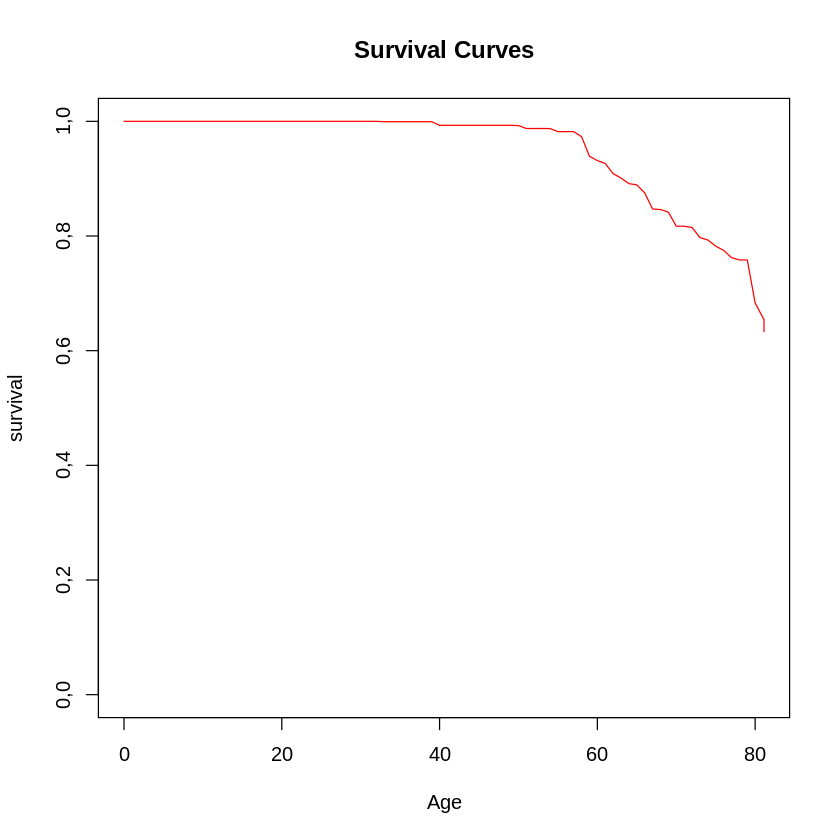

In [12]:
# Plot the survival model
plot(r_fit$unique.death.times,r_fit$survival[1,], 
     type = "l", 
     ylim = c(0,1),
     col = "red",
     xlab = "Age",
     ylab = "survival",
     main = "Survival Curves")

In [ ]:
#Giving error!

cols <- colors()
for (n in sample(c(2:dim(df)[1]), 20)){
  lines(r_fit$unique.death.times, r_fit$survival[n,], type = "l", col = cols[n])
}
lines(death_times, avg_prob, lwd = 2)
legend(500, 0.7, legend = c('Average = black'))

In [ ]:
vi <- data.frame(sort(round(r_fit$variable.importance, 4), decreasing = TRUE))
names(vi) <- "importance"
head(vi)

In [ ]:
cat("Prediction Error = 1 - Harrell's c-index = ", r_fit$prediction.error)

In [ ]:
# Set up for ggplot
kmi <- rep("KM",length(km_fit$time))
km_df <- data.frame(km_fit$time,km_fit$surv,kmi)
names(km_df) <- c("Time","Surv","Model")

coxi <- rep("Cox",length(cox_fit$time))
cox_df <- data.frame(cox_fit$time,cox_fit$surv,coxi)
names(cox_df) <- c("Time","Surv","Model")

rfi <- rep("RF",length(r_fit$unique.death.times))
rf_df <- data.frame(r_fit$unique.death.times,avg_prob,rfi)
names(rf_df) <- c("Time","Surv","Model")

plot_df <- rbind(km_df,cox_df,rf_df)

p <- ggplot(plot_df, aes(x = Time, y = Surv, color = Model))
p + geom_line()